In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from matplotlib import rcParams
from wordcloud import WordCloud

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1) 


In [3]:
#Code:
# reading the csv file into pandas dataframes
df=pd.read_csv('train.csv')


In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [5]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [6]:
#creating a new column- length 
# this gives the length of the post
df['length'] = np.NaN
for i in range(0,len(df['text'])):
    df['length'][i]=(len(df['text'][i]))
df.length = df.length.astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


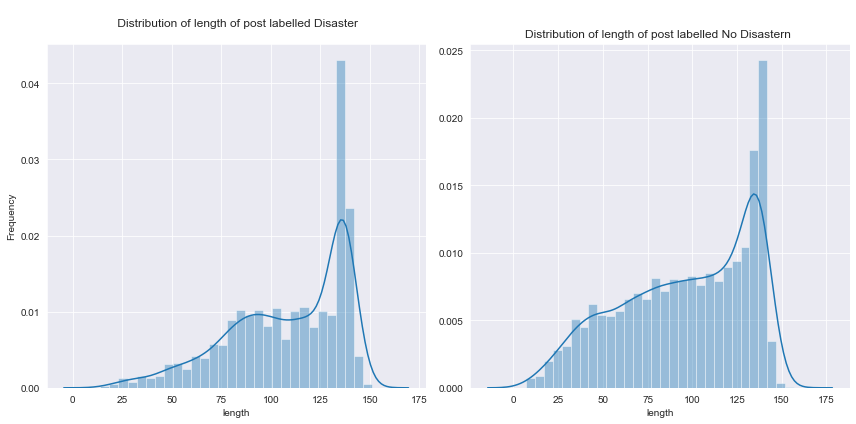

In [7]:
#creating subplots to see distribution of length of post 
sns.set_style("darkgrid");
f, (ax1, ax2) = plt.subplots(figsize=(12,6),nrows=1, ncols=2,tight_layout=True);
sns.distplot(df[df['target']==1]["length"],bins=30,ax=ax1);
sns.distplot(df[df['target']==0]["length"],bins=30,ax=ax2);
ax1.set_title('\n Distribution of length of post labelled Disaster\n');
ax2.set_title('\nDistribution of length of post labelled No Disastern ');
ax1.set_ylabel('Frequency');

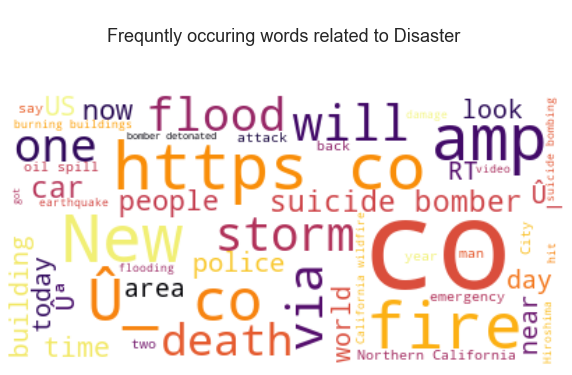

In [8]:
# word cloud for words related to Disaster 
text=" ".join(post for post in df[df['target']==1].text)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nFrequntly occuring words related to Disaster \n\n',fontsize=18)
plt.axis("off")
plt.show()

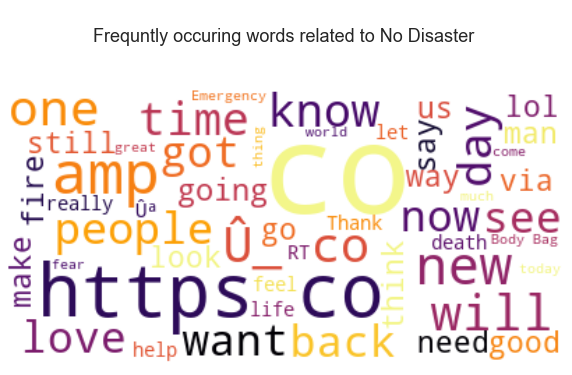

In [9]:
# word cloud for words related to No Disaster 
text=" ".join(post for post in df[df['target']==0].text)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nFrequntly occuring words related to No Disaster \n\n',fontsize=18)
plt.axis("off")
plt.show()

In [10]:
#calculating basline accuracy
df['target'].value_counts(normalize=True)

0    0.57034
1    0.42966
Name: target, dtype: float64

### Tokenizing

When we "tokenize" data, we take it and split it up into distinct chunks based on some pattern.

In [11]:
# Import Tokenizer
from nltk.tokenize import RegexpTokenizer

In [12]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\w+') 


In [13]:
#changing the contents of selftext to lowercase
df.loc[:,'text'] = df.text.apply(lambda x : str.lower(x))

In [14]:
#removing hyper link, latin characters and digits
df['text']=df['text'].str.replace('http.*.*', '',regex = True)
df['text']=df['text'].str.replace('û.*.*', '',regex = True)
df['text']=df['text'].str.replace(r'\d+','',regex= True)

In [15]:
# "Run" Tokenizer
df['tokens'] = df['text'].map(tokenizer.tokenize)

In [16]:
#displaying first 5 rows of dataframe
df.head()

,id,keyword,location,text,target,length,tokens
0,1,NaN,NaN,our deeds are the reason of this #earthquake may allah forgive us all,1,69,"[our, deeds, are, the, reason, of, this, earthquake, may, allah, forgive, us, all]"
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected,1,133,"[all, residents, asked, to, shelter, in, place, are, being, notified, by, officers, no, other, evacuation, or, shelter, in, place, orders, are, expected]"
3,6,NaN,NaN,", people receive #wildfires evacuation orders in california",1,65,"[people, receive, wildfires, evacuation, orders, in, california]"
4,7,NaN,NaN,just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,88,"[just, got, sent, this, photo, from, ruby, alaska, as, smoke, from, wildfires, pours, into, a, school]"


### Removing Stop Words

In [17]:
# Printing English stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
#assigning stopwords to a variable
stop = stopwords.words("english")

In [19]:
# adding this stop word to list of stopwords as it appears on frequently occuring word
item=['amp'] #'https','co','http','û','ûò','ûó','û_'

In [20]:
# stop

In [21]:
stop.extend(item)

In [22]:
#removing stopwords from tokens
df['tokens']=df['tokens'].apply(lambda x: [item for item in x if item not in stop])

### Lemmatizing 
When we "lemmatize" data, we take words and attempt to return their *lemma*, or the base/dictionary form of a word.<br>


In [23]:
# Importing lemmatizer 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Instantiating lemmatizer 
lemmatizer = WordNetLemmatizer()


In [24]:
lemmatize_words=[]
for i in range (len(df['tokens'])):
    word=''
    for j in range(len(df['tokens'][i])):
        lemm_word=lemmatizer.lemmatize(df['tokens'][i][j])#lemmatize
        
        word=word + ' '+lemm_word # joining tokens into sentence    
    lemmatize_words.append(word) # store in list
   

In [25]:
#creating a new column to store the result
df['lemmatized']=lemmatize_words

In [26]:
#displaying first 5 rows of dataframe
df.head()

,id,keyword,location,text,target,length,tokens,lemmatized
0,1,NaN,NaN,our deeds are the reason of this #earthquake may allah forgive us all,1,69,"[deeds, reason, earthquake, may, allah, forgive, us]",deed reason earthquake may allah forgive u
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38,"[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected,1,133,"[residents, asked, shelter, place, notified, officers, evacuation, shelter, place, orders, expected]",resident asked shelter place notified officer evacuation shelter place order expected
3,6,NaN,NaN,", people receive #wildfires evacuation orders in california",1,65,"[people, receive, wildfires, evacuation, orders, california]",people receive wildfire evacuation order california
4,7,NaN,NaN,just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,88,"[got, sent, photo, ruby, alaska, smoke, wildfires, pours, school]",got sent photo ruby alaska smoke wildfire pours school


## Modelling 
---
 This step creates three models and compares them.

>1.Logistic Regression Model<br>
>2.Naive Bayes Model<br>
>3.Decision Tree Model<br>
>4.Comapring Models

In [27]:
#imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [28]:
#defining X and y for the model
X = df['lemmatized']
y = df['target']

In [29]:
# Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [30]:
#ensuring that the value counts are quite evenly distributed
y_train.value_counts()

0    3256
1    2453
Name: target, dtype: int64

In [31]:
y_test.shape

(1904,)

### Logistic Regression Model

In [32]:
# pipeline will consist of two stages:
# 1.Instantiating countVectorizer
# 2.Instantiating logistic regression model

pipe = Pipeline([
    ('cvec', CountVectorizer()),  
    ('lr', LogisticRegression()) 
])

In [33]:
tuned_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [2,3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=tuned_params, cv=3) # Evaluating model on unseen data

model_lr=gs.fit(X_train, y_train) # Fitting model

# This is the average of all cv folds for a single 
#combination of the parameters specified in the tuned_params
print(gs.best_score_) 

#displaying the best values of parameters
gs.best_params_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.7801716587843756


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'cvec__max_df': 0.9,
 'cvec__max_features': 3000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [34]:
# Test score
gs.score(X_train, y_train)

0.8894727623051323

In [35]:
# Test score
gs.score(X_test, y_test)

0.7977941176470589

In [36]:
# Generating predictions!
predictions_lr = model_lr.predict(X_test)

In [37]:
# Importing the confusion matrix function
from sklearn.metrics import confusion_matrix

In [38]:
# Generating confusion matrix
confusion_matrix(y_test, predictions_lr)

array([[942, 144],
       [241, 577]])

In [39]:
#interpreting confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions_lr).ravel()

In [40]:
#values with coreesponding labels
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 942
False Positives: 144
False Negatives: 241
True Positives: 577


### Naive Bayes Model

In [41]:
# Importing model
from sklearn.naive_bayes import MultinomialNB

In [42]:
# Instantiating model
nb = MultinomialNB()

In [43]:
# Instantiating CountVectorizer.
cvec = CountVectorizer(max_features = 500)

In [44]:
# fit_transform() fits the model and transforms training data into feature vectors
X_train_cvec = cvec.fit_transform(X_train, y_train).todense()

In [45]:
#tranform test data and convert into array
X_test_cvec = cvec.transform(X_test).todense()

In [46]:
# Fitting model
model_nb=nb.fit(X_train_cvec, y_train)

In [47]:
# Generating predictions
predictions_nb = model_nb.predict(X_test_cvec)

In [48]:
# Training score
model_nb.score(X_train_cvec, y_train)

0.7836748992818356

In [49]:
# Test score
model_nb.score(X_test_cvec, y_test)

0.773109243697479

In [50]:
# Generating confusion matrix
confusion_matrix(y_test, predictions_nb)

array([[914, 172],
       [260, 558]])

In [51]:
#interpreting confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions_nb).ravel()

In [52]:
#values with coreesponding labels
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 914
False Positives: 172
False Negatives: 260
True Positives: 558


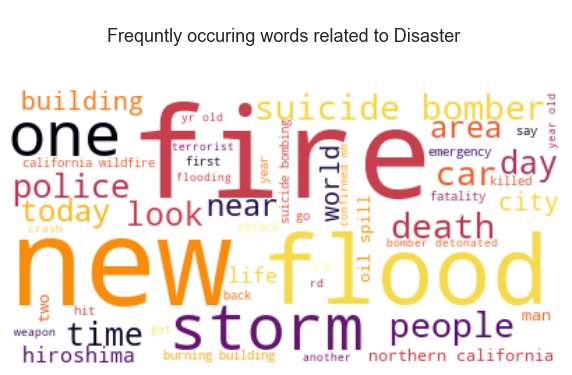

In [53]:
# word cloud for Frequntly occuring words related to Disaster
text=" ".join(post for post in df[df['target']==1].lemmatized)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nFrequntly occuring words related to Disaster \n\n',fontsize=18)
plt.axis("off")
plt.show()

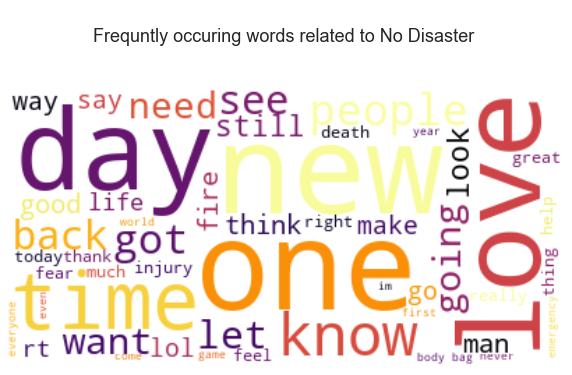

In [54]:
# word cloud for Frequntly occuring words related to No Disaster
text=" ".join(post for post in df[df['target']==0].lemmatized)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nFrequntly occuring words related to No Disaster \n\n',fontsize=18)
plt.axis("off")
plt.show()

# TEST DATA

In [55]:
#reading the test data
test=pd.read_csv('test.csv')

In [56]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [57]:
#creating a new column- length 
# this gives the length of the post
test['length'] = np.NaN
for i in range(0,len(test['text'])):
    test['length'][i]=(len(test['text'][i]))
test.length = test.length.astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


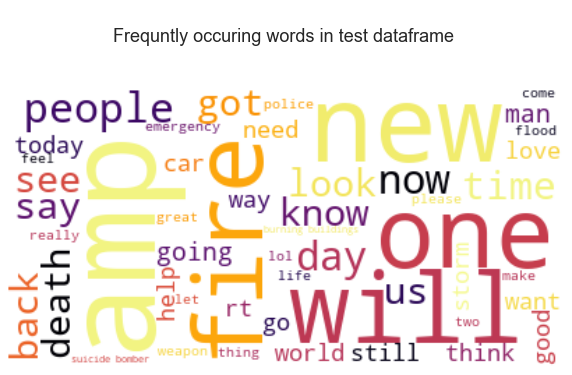

In [58]:
# word cloud for Frequntly occuring words in test dataframe
text=" ".join(post for post in df.text)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nFrequntly occuring words in test dataframe \n\n',fontsize=18)
plt.axis("off")
plt.show()

In [59]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [60]:
#changing the contents of selftext to lowercase
test.loc[:,'text'] = test.text.apply(lambda x : str.lower(x))

In [61]:
#removing hyper link and latin characters
test['text']=test['text'].str.replace('http.*.*', '',regex = True)
test['text']=test['text'].str.replace('û.*.*', '',regex = True)
test['text']=test['text'].str.replace(r'\d+','',regex= True)

In [62]:
# "Run" Tokenizer
test['tokens'] = test['text'].map(tokenizer.tokenize)

In [63]:
#displaying first 5 rows of dataframe
test.head()

,id,keyword,location,text,length,tokens
0,0,NaN,NaN,just happened a terrible car crash,34,"[just, happened, a, terrible, car, crash]"
1,2,NaN,NaN,"heard about #earthquake is different cities, stay safe everyone.",64,"[heard, about, earthquake, is, different, cities, stay, safe, everyone]"
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, i cannot save them all",96,"[there, is, a, forest, fire, at, spot, pond, geese, are, fleeing, across, the, street, i, cannot, save, them, all]"
3,9,NaN,NaN,apocalypse lighting. #spokane #wildfires,40,"[apocalypse, lighting, spokane, wildfires]"
4,11,NaN,NaN,typhoon soudelor kills in china and taiwan,45,"[typhoon, soudelor, kills, in, china, and, taiwan]"


In [64]:
#removing stopwords from tokens
test['tokens']=test['tokens'].apply(lambda x: [item for item in x if item not in stop])

In [65]:
lemmatize_words=[]
for i in range (len(test['tokens'])):
    word=''
    for j in range(len(test['tokens'][i])):
        lemm_word=lemmatizer.lemmatize(test['tokens'][i][j])#lemmatize
        
        word=word + ' '+lemm_word # joining tokens into sentence    
    lemmatize_words.append(word) # store in list
   

In [66]:
#creating a new column to store the result
test['lemmatized']=lemmatize_words

In [67]:
#displaying first 5 rows of dataframe
test.head()

,id,keyword,location,text,length,tokens,lemmatized
0,0,NaN,NaN,just happened a terrible car crash,34,"[happened, terrible, car, crash]",happened terrible car crash
1,2,NaN,NaN,"heard about #earthquake is different cities, stay safe everyone.",64,"[heard, earthquake, different, cities, stay, safe, everyone]",heard earthquake different city stay safe everyone
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, i cannot save them all",96,"[forest, fire, spot, pond, geese, fleeing, across, street, cannot, save]",forest fire spot pond goose fleeing across street cannot save
3,9,NaN,NaN,apocalypse lighting. #spokane #wildfires,40,"[apocalypse, lighting, spokane, wildfires]",apocalypse lighting spokane wildfire
4,11,NaN,NaN,typhoon soudelor kills in china and taiwan,45,"[typhoon, soudelor, kills, china, taiwan]",typhoon soudelor kill china taiwan


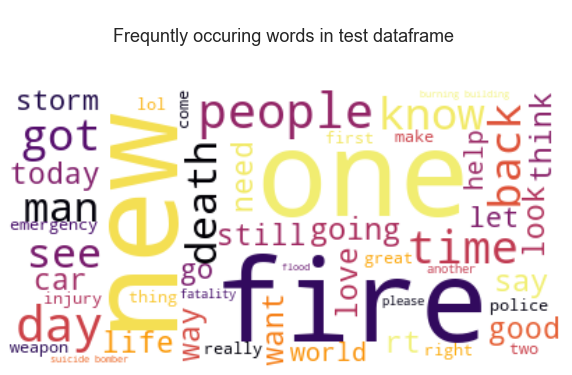

In [68]:
# word cloud for Frequntly occuring words in test dataframe after lemmatizing
text=" ".join(post for post in df.lemmatized)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nFrequntly occuring words in test dataframe \n\n',fontsize=18)
plt.axis("off")
plt.show()

In [69]:
predictions_kaggle = model_lr.predict(test['lemmatized'])

In [70]:
#tranform test data and convert into array
kaggle_cvec = cvec.transform(test['lemmatized']).todense()

In [71]:
predictions_kaggle_nb=model_nb.predict(kaggle_cvec)

# Creating  .csv file

In [72]:
# Creating an empty data frame
submission_kaggle = pd.DataFrame()

In [73]:
# Assigning values to the data frame-submission_kaggle
submission_kaggle['Id'] = test.id
submission_kaggle['target'] = predictions_kaggle

In [74]:
# Head of submission_kaggle
submission_kaggle.head()

,Id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [75]:
# saving data as  final_kaggle.csv
submission_kaggle.loc[ :].to_csv('final_kaggle.csv',index=False)

# NAIVE BAYES PREDICTION

In [76]:
# Creating an empty data frame
submission_kaggle_nb = pd.DataFrame()

In [77]:
# Assigning values to the data frame-submission_kaggle
submission_kaggle_nb['Id'] = test.id
submission_kaggle_nb['target'] = predictions_kaggle_nb

In [78]:
# Head of submission_kaggle
submission_kaggle_nb.head()

,Id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [79]:
# saving data as  final_kaggle.csv
submission_kaggle_nb.loc[ :].to_csv('final_kaggle_nb.csv',index=False)